#García Gutiérrez Juan Alberto 18330437

Librerias y cargar dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

from scipy.stats import zscore
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
data_clima=pd.read_csv('weatherAUS.csv',parse_dates=['Date'])
data_clima.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Preprocesamiento de los datos


Búsqueda de datos perdidos

In [3]:
data_clima.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [4]:
data_clima.shape

(145460, 23)

In [5]:
data_clima.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm','Location'],axis=1,inplace=True)

In [6]:
data_clima.shape

(145460, 18)

In [7]:
#Rellenamos los valores nulos con los valores promedios en donde si se encuentran
def rellenar(info):
    columnas=info.columns
    for col in columnas:
        if info[col].dtype=='object':
            info[col].fillna(method='ffill',inplace=True)
        else:
            info[col].fillna(info[col].median(),inplace=True)
    return info

In [8]:
data_filtro=rellenar(data_clima)

In [9]:
data_filtro.isnull().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Asignación de valores de prueba y entrenamiento

In [10]:
train_data,test_data=train_test_split(data_filtro,test_size=0.2,random_state=40)

Categóricas

In [11]:
categoricas=[]
columnas_num=[]
for col in data_filtro.columns:
    if data_filtro[col].dtype=='object':
        categoricas.append(col)
    else:
        columnas_num.append(col)
categoricas

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [12]:
encoder=LabelEncoder()
train_data.WindGustDir=encoder.fit_transform(train_data.WindGustDir)
test_data.WindGustDir=encoder.transform(test_data.WindGustDir)
for col in categoricas[1:3]:
    train_data[col]=encoder.fit_transform(train_data[col])
    test_data[col]=encoder.transform(test_data[col])

In [13]:
px.bar(data_frame=train_data,x=train_data.RainToday.value_counts().index.values,y=train_data.RainToday.value_counts(),
       color=['No','Sí'],title='¿Lloverá hoy?')

In [14]:
px.bar(data_frame=train_data,x=train_data.RainTomorrow.value_counts().index.values,y=train_data.RainTomorrow.value_counts(),
       color=['No','Sí'],title='¿Lloverá mañana?')

#Numéricas

In [15]:
# Numerical columns
columnas_num

['Date',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [16]:
train_data.describe()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.186697,23.209176,2.332646,7.978052,39.955125,7.327031,7.817922,14.043294,18.669342,68.913627,51.556966,1017.640890,1015.246796,16.979626,21.664342
std,6.358890,7.087014,8.495613,4.682011,13.104732,4.524088,4.584200,8.867852,8.707922,18.851740,20.468450,6.730806,6.666730,6.446216,6.849702
min,-8.500000,-4.800000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,982.000000,978.200000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,4.000000,31.000000,3.000000,4.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,12.300000,16.700000
50%,12.000000,22.600000,0.000000,8.000000,39.000000,7.000000,8.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000
75%,16.800000,28.200000,0.600000,12.000000,46.000000,11.000000,12.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.200000
max,33.900000,48.100000,371.000000,15.000000,135.000000,15.000000,15.000000,130.000000,83.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.200000


In [17]:
#Eliminación de filas con puntuación Z Score superior a 3 o inferior a -3.

datafiltro_train=train_data[abs(zscore(train_data.Rainfall))<3]

In [18]:
prediction_encoder=LabelEncoder()
datafiltro_train.RainToday=prediction_encoder.fit_transform(datafiltro_train.RainToday)
datafiltro_train.RainTomorrow=prediction_encoder.transform(datafiltro_train.RainTomorrow)

test_data.RainToday=prediction_encoder.transform(test_data.RainToday)
test_data.RainTomorrow=prediction_encoder.transform(test_data.RainTomorrow)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
datafiltro_train

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
53108,2011-11-12,5.8,17.1,0.0,12,39.0,15,15,13.0,11.0,77.0,41.0,1017.6,1015.2,8.8,16.6,0,0
29920,2016-10-13,10.3,19.8,0.0,9,44.0,11,9,22.0,28.0,51.0,46.0,1021.9,1021.6,14.9,18.7,0,0
24240,2009-03-23,15.9,30.7,0.0,4,31.0,8,1,11.0,9.0,89.0,37.0,1017.6,1015.2,19.0,30.3,0,0
117187,2016-04-10,17.2,27.0,14.2,0,59.0,0,0,35.0,28.0,67.0,53.0,1020.2,1018.0,20.7,26.3,1,0
139487,2009-07-12,18.8,30.1,0.0,1,37.0,0,6,19.0,22.0,63.0,55.0,1012.7,1009.6,24.4,29.3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56760,2013-09-13,1.1,10.2,0.2,5,50.0,5,5,35.0,28.0,59.0,69.0,1016.4,1013.8,7.7,8.1,0,1
93176,2017-03-14,21.4,27.1,2.2,10,57.0,2,10,20.0,43.0,84.0,74.0,1016.4,1014.4,25.8,25.6,1,1
30727,2009-08-05,7.6,19.3,0.0,13,39.0,13,2,17.0,15.0,69.0,40.0,1022.8,1020.4,10.5,17.5,0,0
112859,2012-07-02,9.3,19.2,0.0,3,33.0,5,5,9.0,17.0,70.0,52.0,1028.3,1025.6,13.5,18.2,0,0


In [20]:
datafiltro_train.drop(['Date'],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



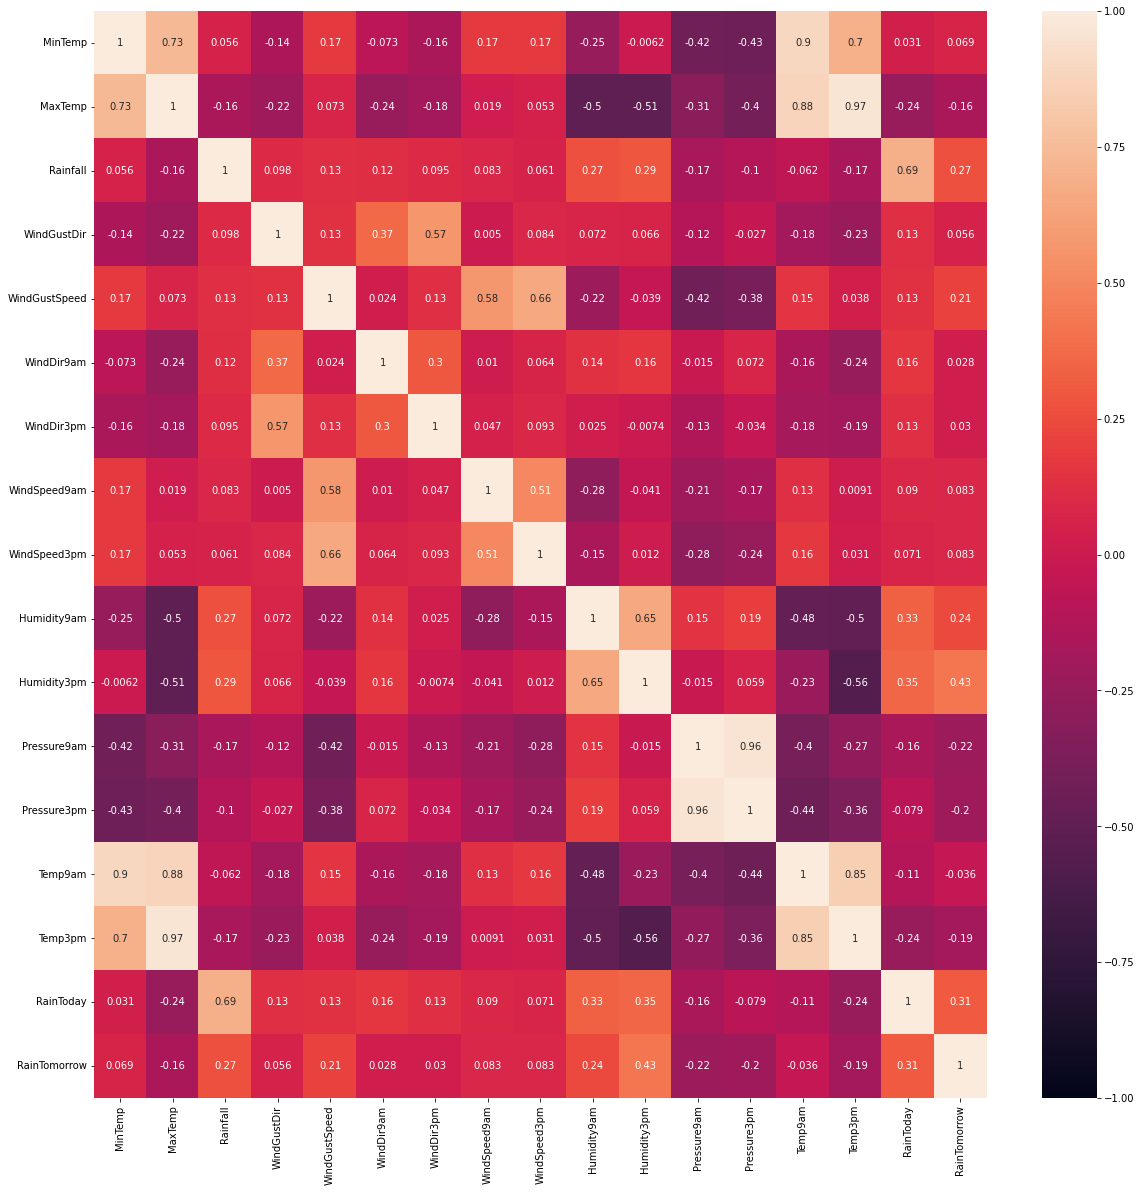

In [21]:
# Se verifica la correlación
plt.figure(figsize=(20,20))
sns.heatmap(datafiltro_train.corr(),annot=True,vmin=-1)
plt.show()

Algunas de las características están altamente correlacionadas con otras, por lo que se eliminan las características con una correlación superior a 0,7.

In [22]:
datafiltro_train.drop(['MinTemp','MaxTemp','Temp9am','Pressure3pm'],inplace=True,axis=1)

In [23]:
test_data.drop(['MinTemp','MaxTemp','Temp9am','Pressure3pm','Date'],inplace=True,axis=1)

Para solucionar el desabalance entre los datos, se utiliza SMOTE, cual equilibra la distribución de clases aumentando aleatoriamente los ejemplos.

In [24]:
oversample=SMOTE()
train_inputs,train_output=oversample.fit_resample(datafiltro_train.drop(['RainToday'],axis=1),datafiltro_train.RainToday)

In [25]:
fig=px.pie(train_output,names=prediction_encoder.inverse_transform([0,1]),values=train_output.value_counts(),
   hole=0.3,title='¿Lloverá hoy?')
fig.show()

Se crean los valores de train y test, son 2 debido a que uno se utilizara al final para responder a la pregunta precisa sobre si ¿Lloverá mañana? en base a los datos del dataset.

In [26]:
train_x,train_y1,train_y2=train_inputs.iloc[:,:11],train_output,train_inputs.iloc[:,11]
test_x,test_y1,test_y2=test_data.iloc[:,:11],test_data.iloc[:,11],test_data.iloc[:,12]

#Modelos

#Regresión logística

In [27]:
modelLR=LogisticRegression()
modelLR.fit(train_x,train_y1)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [28]:
print('Reporte de clasificación de training data\n',classification_report(train_y1,modelLR.predict(train_x)))
print('Reporte de clasificación de prueba data\n',classification_report(test_y1,modelLR.predict(test_x)))

Reporte de clasificación de training data
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     90096
           1       0.98      0.98      0.98     90096

    accuracy                           0.98    180192
   macro avg       0.98      0.98      0.98    180192
weighted avg       0.98      0.98      0.98    180192

Reporte de clasificación de prueba data
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     22602
           1       0.95      0.97      0.96      6490

    accuracy                           0.98     29092
   macro avg       0.97      0.98      0.97     29092
weighted avg       0.98      0.98      0.98     29092



In [29]:
print('La precision de train de Regresión Logística es {0} %'.format((accuracy_score(train_y1,modelLR.predict(train_x))*100).round(2)))
print('La precisión de prueba de Regresión Logística es {0} %'.format((accuracy_score(test_y1,modelLR.predict(test_x))*100).round(2)))

La precision de train de Regresión Logística es 98.03 %
La precisión de prueba de Regresión Logística es 98.12 %


#Random Forest

In [30]:
model_random_forest=RandomForestClassifier(max_depth=8)
model_random_forest.fit(train_x,train_y1)
RandomForestClassifier(max_depth=8)

RandomForestClassifier(max_depth=8)

In [31]:
print('Reporte de clasificación de training data\n',classification_report(train_y1,model_random_forest.predict(train_x)))
print('Reporte de clasificación de prueba data\n',classification_report(test_y1,model_random_forest.predict(test_x)))

Reporte de clasificación de training data
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     90096
           1       1.00      0.97      0.99     90096

    accuracy                           0.99    180192
   macro avg       0.99      0.99      0.99    180192
weighted avg       0.99      0.99      0.99    180192

Reporte de clasificación de prueba data
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     22602
           1       1.00      0.97      0.99      6490

    accuracy                           0.99     29092
   macro avg       1.00      0.99      0.99     29092
weighted avg       0.99      0.99      0.99     29092



In [32]:
print('La precisición de train de Random Forest es {0} %'.format((accuracy_score(train_y1,model_random_forest.predict(train_x))*100).round(2)))
print('La precisión de validación de Random Forest es {0} %'.format((accuracy_score(test_y1,model_random_forest.predict(test_x))*100).round(2)))

La precisición de train de Random Forest es 98.75 %
La precisión de validación de Random Forest es 99.37 %


#Prediccion lluvia mañana

In [33]:
train_x2=pd.concat([train_x,train_y1],axis=1)

In [34]:
test_y1_pred=pd.Series(model_random_forest.predict(test_x),name='RainToday')
test_x2=pd.concat([test_x.reset_index(drop=True),test_y1_pred.reset_index(drop=True)],axis=1)

In [35]:
model_random_forest2=RandomForestClassifier()
model_random_forest2.fit(train_x2,train_y2)

RandomForestClassifier()

In [36]:
print('La precisión de train para predecir si lloverá mañana es {0} %'.format((accuracy_score(train_y2,model_random_forest2.predict(train_x2))*100).round(2)))
print('La precisión de prueba para predecir si lloverá mañana es {0} %'.format((accuracy_score(test_y2,model_random_forest2.predict(test_x2))*100).round(2)))

La precisión de train para predecir si lloverá mañana es 99.98 %
La precisión de prueba para predecir si lloverá mañana es 84.06 %
